Frequency analysis 
===================

For every $20^{th}$ file from 06.01.2016 to 30.04.2016

In [5]:
%matplotlib notebook

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# To import files from another folder
import sys
sys.path.append('../')
import filehandler as fh
import datahandler as dh
import datastruct as ds

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')

# Displaying DataFrame with frequencies

In [6]:
df = fh.loadDataH5('../data/struct_freq_only/', 'freq_every_20th_file.h5')
df

,MG2TE201/Meas1/PRIM,MG4TE517/Meas1/PRIM,MG2PT401/Meas1/PRIM,MG2TE272/Meas1/PRIM,MG4TE705/Meas1/PRIM,SP058/Meas1/PRIM,EG005/Meas1/PRIM,IBS009/Meas1/PRIM,SW012/OutRunning/PRIM,MG1PT201/Meas1/PRIM,...,CA004/Meas1/PRIM,MG2TE703/Meas1/PRIM,MI210/Meas1/PRIM,EG009/Meas1/PRIM,RG020/Meas1/PRIM,MP2068/Meas1/PRIM,RD118/Meas1/PRIM,LC007/Meas1/PRIM,MG3TE101/Meas1/PRIM,GC_S1_COMP_N2/Meas1/PRIM
10th,0.076923,0.000046,0.111111,0.083333,0.000046,0.100000,0.499750,0.000046,0.001667,0.000484,...,0.003731,0.090909,0.099083,0.000047,0.200040,0.004348,0.062496,0.500000,0.200000,0.001047
25th,0.200000,0.000046,0.250000,0.200000,0.000046,0.166694,0.990099,0.000064,0.001667,0.000536,...,0.011765,0.250000,0.497760,0.000061,0.333333,0.008696,0.125016,0.999001,0.333333,0.001948
50th,0.500000,0.000046,0.498753,0.500000,0.000046,0.333333,0.999001,0.000109,0.001667,0.001757,...,0.040000,0.500000,0.999001,0.000129,0.500000,0.015151,0.250063,1.000000,0.500000,0.003155
75th,1.000000,0.000046,0.500250,1.000000,0.000046,0.500250,1.001001,0.000370,0.001667,0.065128,...,0.250063,1.000000,1.000000,0.004068,1.000000,0.028572,0.500000,1.000000,1.000000,0.003185
90th,1.000000,0.000046,1.000000,1.000000,0.000046,1.000000,1.002004,0.024415,0.001667,0.200000,...,1.000000,1.000000,1.001001,0.010223,1.000000,0.052643,1.000000,1.001001,1.000000,0.003236
Mean,0.540679,0.000046,0.482008,0.555661,0.000046,0.433469,0.871604,0.004856,0.002018,0.066342,...,0.230596,0.609109,0.732927,0.003705,0.616135,0.028280,0.389252,0.910849,0.647512,0.003016


# Plotting percentiles and mean

<IPython.core.display.Javascript object>


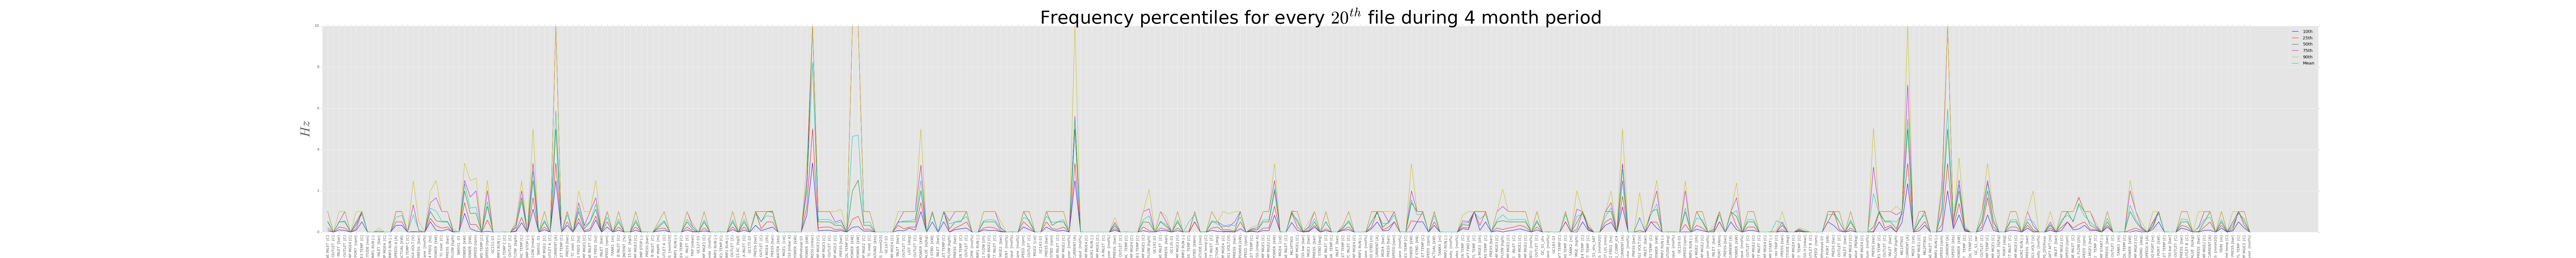

In [7]:
color = ['b', 'r', 'g', 'm', 'y', 'c']

fig = plt.figure(figsize=(100,10))
ax = fig.add_subplot(111)
x = np.arange(338)+1

for i,index in enumerate(df.index):
    ax.plot(x, df.loc[index], color=color[i], label=index)

ax.set_xticks(x)
ax.set_xticklabels([ds.tag2name(tag) for tag in df.columns], rotation='vertical')
ax.set_title('Frequency percentiles for every $20^{th}$ file during 4 month period', fontsize = 50)
ax.set_ylabel('$Hz$', fontsize = 36)
ax.legend()

# Plotting sorted mean frequency

<IPython.core.display.Javascript object>


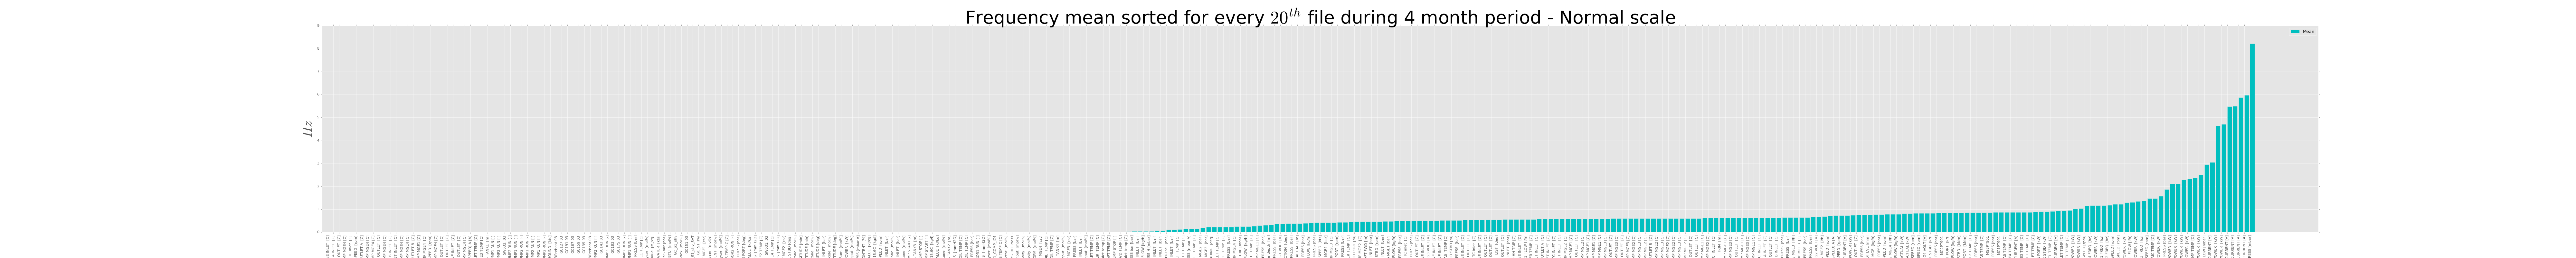

In [8]:
fig2 = plt.figure(figsize=(100,10))
ax2 = fig2.add_subplot(111)

df_sorted_mean = df.T.sort_values('Mean', ascending=True).T
ax2.bar(x, df_sorted_mean.loc['Mean'], color=color[5], label='Mean')

ax2.set_xticks(x)
ax2.set_xticklabels([ds.tag2name(tag) for tag in df_sorted_mean.columns], rotation='vertical')
ax2.set_title('Frequency mean sorted for every $20^{th}$ file during 4 month period - Normal scale', fontsize = 50)
ax2.set_ylabel('$Hz$', fontsize = 36)
ax2.legend()

# Grouping variables into 3 groups based on normal scaling

<IPython.core.display.Javascript object>


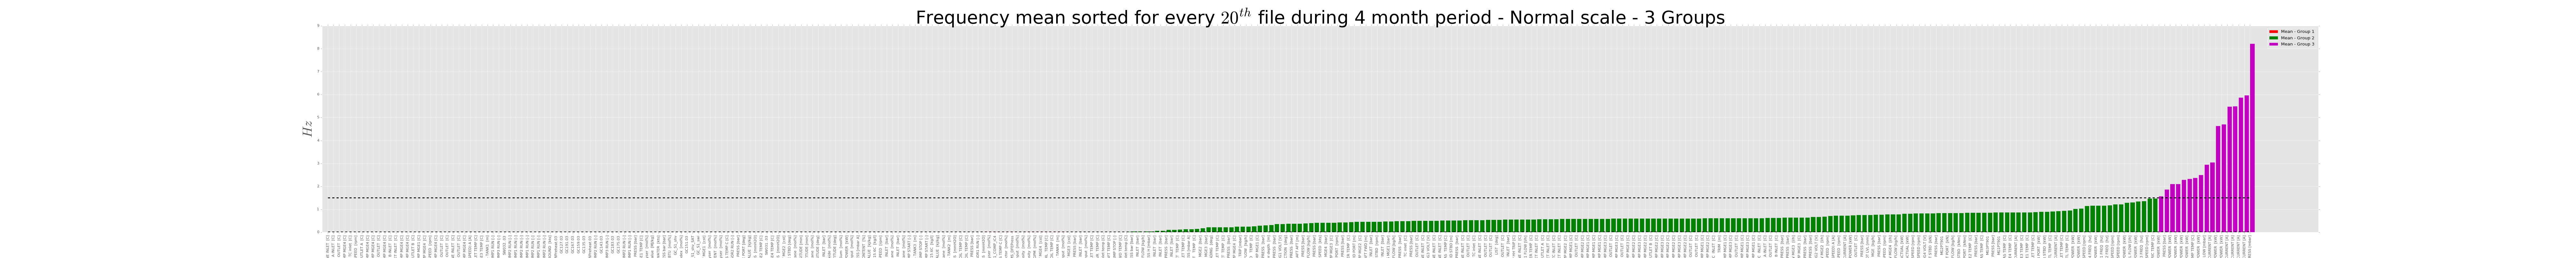

In [9]:
group1 = []
group2 = []
group3 = []
for col in df_sorted_mean.columns:
    if df_sorted_mean.loc['Mean', col] < 0.01:
        group1.append(col)
    elif (df_sorted_mean.loc['Mean', col] > 0.01) and (df_sorted_mean.loc['Mean', col] < 1.5):
        group2.append(col)
    else:
        group3.append(col)

n1 = len(group1)
n2 = len(group1)+len(group2)
n3 = len(group1)+len(group2)+len(group3)

fig3 = plt.figure(figsize=(100,10))
ax3 = fig3.add_subplot(111)

ax3.bar(x[0:n1], df_sorted_mean.loc['Mean', group1], color=color[1], label='Mean - Group 1')
ax3.bar(x[n1:n2], df_sorted_mean.loc['Mean', group2], color=color[2], label='Mean - Group 2')
ax3.bar(x[n2:n3], df_sorted_mean.loc['Mean', group3], color=color[3], label='Mean - Group 3')
ax3.plot(x, np.ones(len(x))*0.01, 'k--', linewidth=2.5)
ax3.plot(x, np.ones(len(x))*1.5, 'k--', linewidth=2.5)

ax3.set_xticks(x)
ax3.set_xticklabels([ds.tag2name(tag) for tag in df_sorted_mean.columns], rotation='vertical')
ax3.set_title('Frequency mean sorted for every $20^{th}$ file during 4 month period - Normal scale - 3 Groups', fontsize = 50)
ax3.set_ylabel('$Hz$', fontsize = 36)
ax3.legend()

# Plotting sorted mean frequency using logarithmic scale

<IPython.core.display.Javascript object>


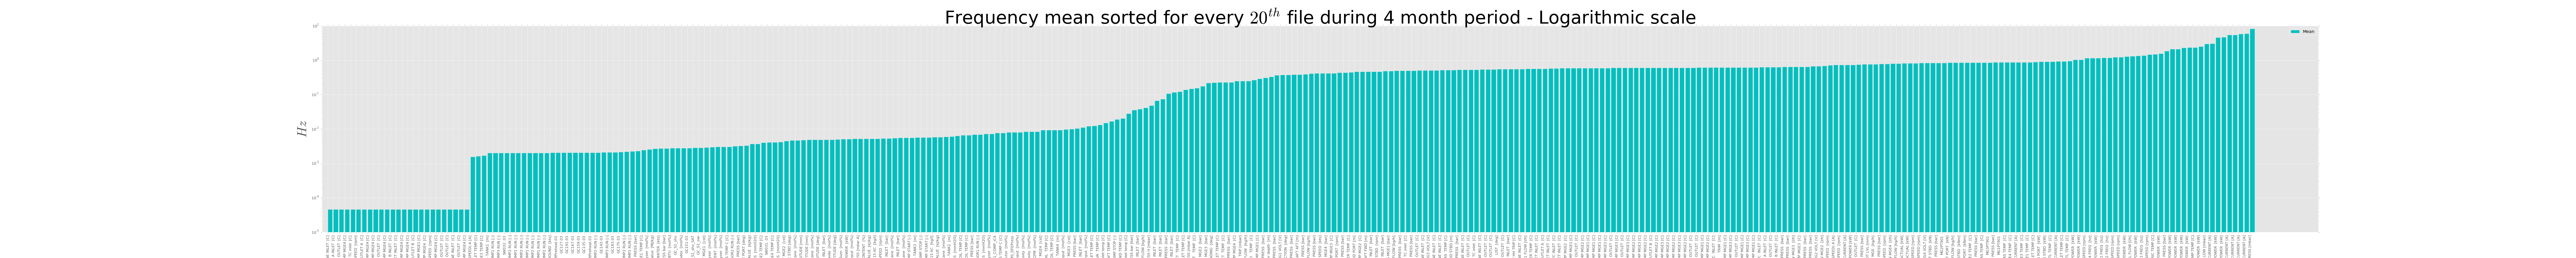

In [10]:
fig4 = plt.figure(figsize=(100,10))
ax4 = fig4.add_subplot(111)

ax4.bar(x, df_sorted_mean.loc['Mean'], color=color[5], label='Mean')

ax4.set_yscale('log')
ax4.set_xticks(x)
ax4.set_xticklabels([ds.tag2name(tag) for tag in df_sorted_mean.columns], rotation='vertical')
ax4.set_title('Frequency mean sorted for every $20^{th}$ file during 4 month period - Logarithmic scale', fontsize = 50)
ax4.set_ylabel('$Hz$', fontsize = 36)
ax4.legend()

# Grouping variables into 4 groups based on logarithmic scaling

<IPython.core.display.Javascript object>


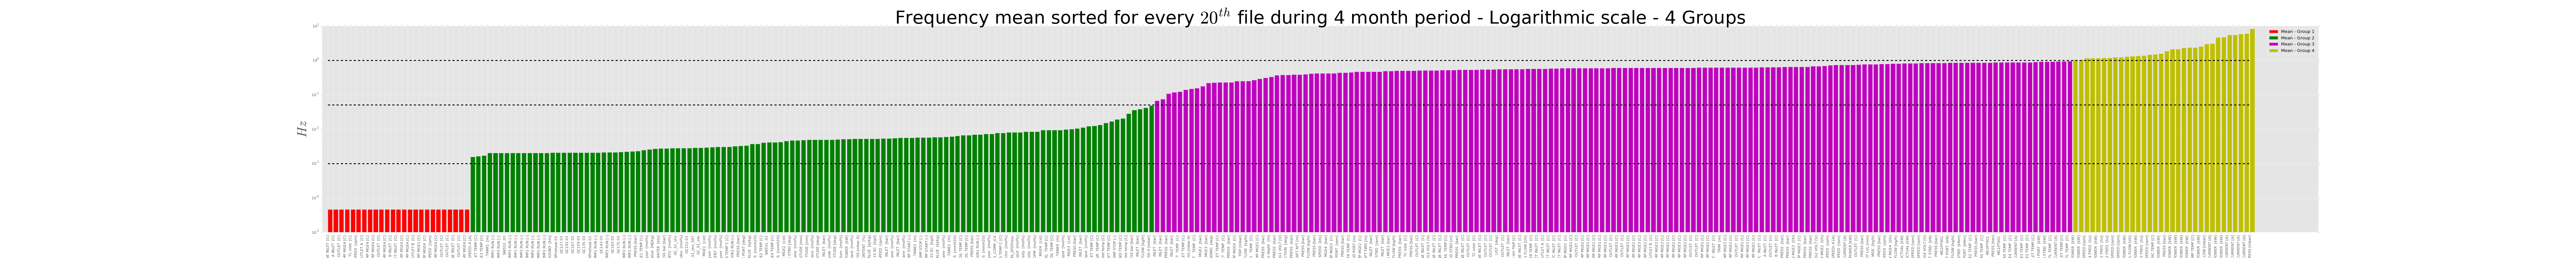

In [11]:
group1_log = []
group2_log = []
group3_log = []
group4_log = []
for col in df_sorted_mean.columns:
    if df_sorted_mean.loc['Mean', col] < 0.001:
        group1_log.append(col)
    elif (df_sorted_mean.loc['Mean', col] > 0.001) and (df_sorted_mean.loc['Mean', col] < 0.05):
        group2_log.append(col)
    elif (df_sorted_mean.loc['Mean', col] > 0.05) and (df_sorted_mean.loc['Mean', col] < 1):
        group3_log.append(col)
    else:
        group4_log.append(col)

n1 = len(group1_log)
n2 = len(group1_log)+len(group2_log)
n3 = len(group1_log)+len(group2_log)+len(group3_log)
n4 = len(group1_log)+len(group2_log)+len(group3_log)+len(group4_log)

fig5 = plt.figure(figsize=(100,10))
ax5 = fig5.add_subplot(111)

ax5.bar(x[0:n1], df_sorted_mean.loc['Mean', group1_log], color=color[1], label='Mean - Group 1')
ax5.bar(x[n1:n2], df_sorted_mean.loc['Mean', group2_log], color=color[2], label='Mean - Group 2')
ax5.bar(x[n2:n3], df_sorted_mean.loc['Mean', group3_log], color=color[3], label='Mean - Group 3')
ax5.bar(x[n3:n4], df_sorted_mean.loc['Mean', group4_log], color=color[4], label='Mean - Group 4')
ax5.plot(x, np.ones(len(x))*0.001, 'k--', linewidth=2.5)
ax5.plot(x, np.ones(len(x))*0.05, 'k--', linewidth=2.5)
ax5.plot(x, np.ones(len(x))*1, 'k--', linewidth=2.5)

ax5.set_yscale('log')
ax5.set_xticks(x)
ax5.set_xticklabels([ds.tag2name(tag) for tag in df_sorted_mean.columns], rotation='vertical')
ax5.set_title('Frequency mean sorted for every $20^{th}$ file during 4 month period - Logarithmic scale - 4 Groups', fontsize = 50)
ax5.set_ylabel('$Hz$', fontsize = 36)
ax5.legend()

# Saving figures

In [12]:
fig.savefig('figures/frequencies.pdf',bbox_inches='tight')
fig2.savefig('figures/frequency_mean_sorted.pdf',bbox_inches='tight')
fig3.savefig('figures/frquency_group_normal.pdf',bbox_inches='tight')
fig4.savefig('figures/frquency_mean_sorted_log.pdf',bbox_inches='tight')
fig5.savefig('figures/frquency_group_log.pdf',bbox_inches='tight')

# Saving groupings as txt files

In [13]:
fh.saveColumn(group1,'group1')
fh.saveColumn(group2,'group2')
fh.saveColumn(group3,'group3')
fh.saveColumn(group1_log,'group1_log')
fh.saveColumn(group2_log,'group2_log')
fh.saveColumn(group3_log,'group3_log')
fh.saveColumn(group4_log,'group4_log')